The Global stats : 
New Confirmed :  70272
Total Confirmed :  3039914
New Deaths :  4620
Total Deaths :  211113
New Recovered :  28234
Total Recovered :  893322
Enter the country name you want to get status of : sri lanka
sri-lanka
Country :  Sri Lanka
Contry Code :  LK
Latitude :  7.87
Longitude :  80.77
Confirmed Cases :  0
Deaths :  0
Recovered :  0
Active :  0
Time Stamp :  2020-01-22T00:00:00Z


Country :  Sri Lanka
Contry Code :  LK
Latitude :  7.87
Longitude :  80.77
Confirmed Cases :  0
Deaths :  0
Recovered :  0
Active :  0
Time Stamp :  2020-01-23T00:00:00Z


Country :  Sri Lanka
Contry Code :  LK
Latitude :  7.87
Longitude :  80.77
Confirmed Cases :  0
Deaths :  0
Recovered :  0
Active :  0
Time Stamp :  2020-01-24T00:00:00Z


Country :  Sri Lanka
Contry Code :  LK
Latitude :  7.87
Longitude :  80.77
Confirmed Cases :  0
Deaths :  0
Recovered :  0
Active :  0
Time Stamp :  2020-01-25T00:00:00Z


Country :  Sri Lanka
Contry Code :  LK
Latitude :  7.87
Longitude :  80.77
Confi

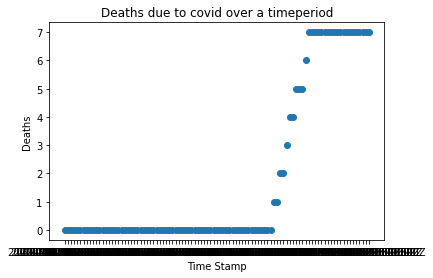

In [2]:
import requests 
import csv 
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import plotly.express as px

url = "https://api.covid19api.com/summary"
request = requests.get(url)
#print(request.text)



Global_json = request.json()
Global_key = Global_json['Global']
print("The Global stats : ")
print("New Confirmed : ",Global_key['NewConfirmed'])
print("Total Confirmed : ",Global_key['TotalConfirmed'])
print("New Deaths : ",Global_key['NewDeaths'])
print("Total Deaths : ",Global_key['TotalDeaths'])
print("New Recovered : ",Global_key['NewRecovered'])
print("Total Recovered : ",Global_key['TotalRecovered'])


url = "https://api.covid19api.com/countries"
request = requests.get(url)
#print(request.text)


country = input("Enter the country name you want to get status of : ").lower().replace(" ","-")
print(country)
file_name = country + ".csv"
csv_file = open(file_name,'w')          #creating a csv file
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Country','ID','Latitude','Longitude','Confirmed Cases','Deaths','Recovered','Active','TimeStamp'])

url = "https://api.covid19api.com/country/" + country
request = requests.get(url)
#print(request.text)

country_json = request.json()
#print(country_json)

for i in range(len(country_json)) :
    country_key = country_json[i]
    print("Country : ",country_key['Country'])
    print("Contry Code : ",country_key['CountryCode'])
    print("Latitude : ",country_key['Lat'])
    print("Longitude : ",country_key['Lon'])
    print("Confirmed Cases : ",country_key['Confirmed'])
    print("Deaths : ",country_key['Deaths'])
    print("Recovered : ",country_key['Recovered'])
    print("Active : ",country_key['Active'])
    print("Time Stamp : ",country_key['Date'])
    csv_writer.writerow([country_key['Country'],country_key['CountryCode'],country_key['Lat'],country_key['Lon'],country_key['Confirmed'],country_key['Deaths'],country_key['Recovered'],country_key['Active'],country_key['Date']])
    print()
    print() 


'''
x = []
y = []

with open(file_name,'r') as csvfile :
    plots = csv.reader(csvfile,delimiter = ',')
    for row in plots :
        x.append((row[8]))
        y.append((row[5]))

plt.plot(x,y,marker = 'o')
#matplotlib.pyplot.yscale(1000)
#ax.set_xticks([0., 1000, 100000000.])
plt.title('Data from the CSV file : deaths and timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Deaths')

plt.draw()
plt.show()
'''
csv_file.close()

file_name = country + ".csv"
df = pd.read_csv(file_name)
times = df["TimeStamp"]
Deaths = df["Deaths"]

x = []
y = []

x = list(times)
y = list(Deaths)

plt.scatter(x,y)
plt.xlabel('Time Stamp')
plt.ylabel('Deaths')
plt.title('Deaths due to covid over a timeperiod')
plt.show()
#fig.show()